## Phase 3 Project Submission


Name : THIGA MARGARET WANJIRU.

Student pace: DS-full time-Online

Submission Date : 10/03/2024



## Topic : SyriaTel Customer Churn.


1.Overview

2.Business Understanding

3.Data Understanding

4.Data Analysis and Exploration

5.Modeling

6.Evaluation

7.Conclusion

8.Recommendations


### Overview:

Customer churn is a major issue for businesses, especially in the telecommunications industry. Understanding and predicting the elements that contribute to customer churn can help businesses design client retention strategies and prevent revenue losses. The goal of this project is to analyse the telecom industry's churn dataset in order to anticipate customer churn and get insight into the key components that drive it.

### Business Understanding:

SyriaTel, a telecommunications company, is experiencing severe churn, with many consumers abandoning its services and migrating to competitors. The company intends to address this issue by creating a churn prediction model. SyriaTel hopes to obtain insights into churn-related factors through analyzing the dataset, with the goal of lowering churn, increasing customer retention, and enhancing overall profitability.

### Data Understanding:

#### Data Source; 
In this project, we will work with a customer churn dataset from the telecom industry sourced from Kaggle, https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset . 

The dataset provides information about customers, including their usage patterns and whether or not they churned. The dataset contains 3,333 records and  21 columns. Of these columns, we identified 6 to be categorical, and 15 as numerical.

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [197]:
# import the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Analysis and Exploration:

In [198]:
# examine columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Analysis of the data types:

Boolean: 1, Float64: 8, Integer64: 8, Object: 4

It is worth noting that each column has 3,333 entries on average. This uniformity implies that the dataset may have no missing values.

In [199]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [200]:
# check for number of rows and columns of the dataframe
df.shape

(3333, 21)

In [201]:
# check the column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Columns:

- State: State the customer lives in. 

- Account Length: How long the customerhas had an account.

- Area Code: Area code of the customer's phone number.

- Phone Number: The customer's phone number.

- International Plan: Whether the customer has an international plan.

- Voice Mail Plan: Whether the customer subscribes to a voice mail plan. 

- Number of Voice Mail Messages: Total number of voice mail messages left by the customer.

- Total Day Minutes: Total of daytime minutes used.

- Total Day Calls: Total of calls made during the day.

- Total Day Charge: Total charges obtained for daytime calls.

- Total Eve Minutes: Total minutes spent on calls in the evening.

- Total Eve Calls: Total of calls made during the evening.

- Total Eve Charge: Total charges for evening calls.

- Total Night Minutes: Total of night time minutes used.

- Total Night Calls: Total of calls made at night.

- Total Night Charge: Total charges obtained for night time calls.

- Total Intl Minutes: Total international minutes (day, evening, and night).

- Total Intl Calls: Total international calls (day, evening, and night).

- Total Intl Charge: Total charges obtained for international calls (day, evening, and night).

- Customer Service Calls: Number of calls made to customer service by the customer.

- Churn: If the customer has churned (true or false)

Data Cleaning:

In [202]:
# check for null values 
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no record of missing values.

In [203]:
# check for duplicates
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
num_duplicate_rows

0

There are no duplicates.

In [204]:
# check for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = df[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

There are no place holders.

In [205]:
# examine data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = df[columns].dtypes
column_data_types

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object

In [206]:
# change state column to categorical data type
df["area code"] = df["area code"].astype("str")
df["area code"].dtype

dtype('O')

In [207]:
# change churn, international plan and voice mail plan column from boolean to integer
df["churn"] = df["churn"].astype(int)
df["churn"].dtype

dtype('int32')

In [208]:
# determine numerical and categorical variable
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns  

numerical_vars = [col for col in numerical_vars if col != 'area code']

categorical_vars = list(df.select_dtypes(include=['object', 'bool']).columns )+ ['area code']

print("The Numerical Variables are:", numerical_vars)
print("\n")
print("The Categorical Variables are:", categorical_vars)

The Numerical Variables are: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


The Categorical Variables are: ['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'area code']


Visualising our numerical variables: 

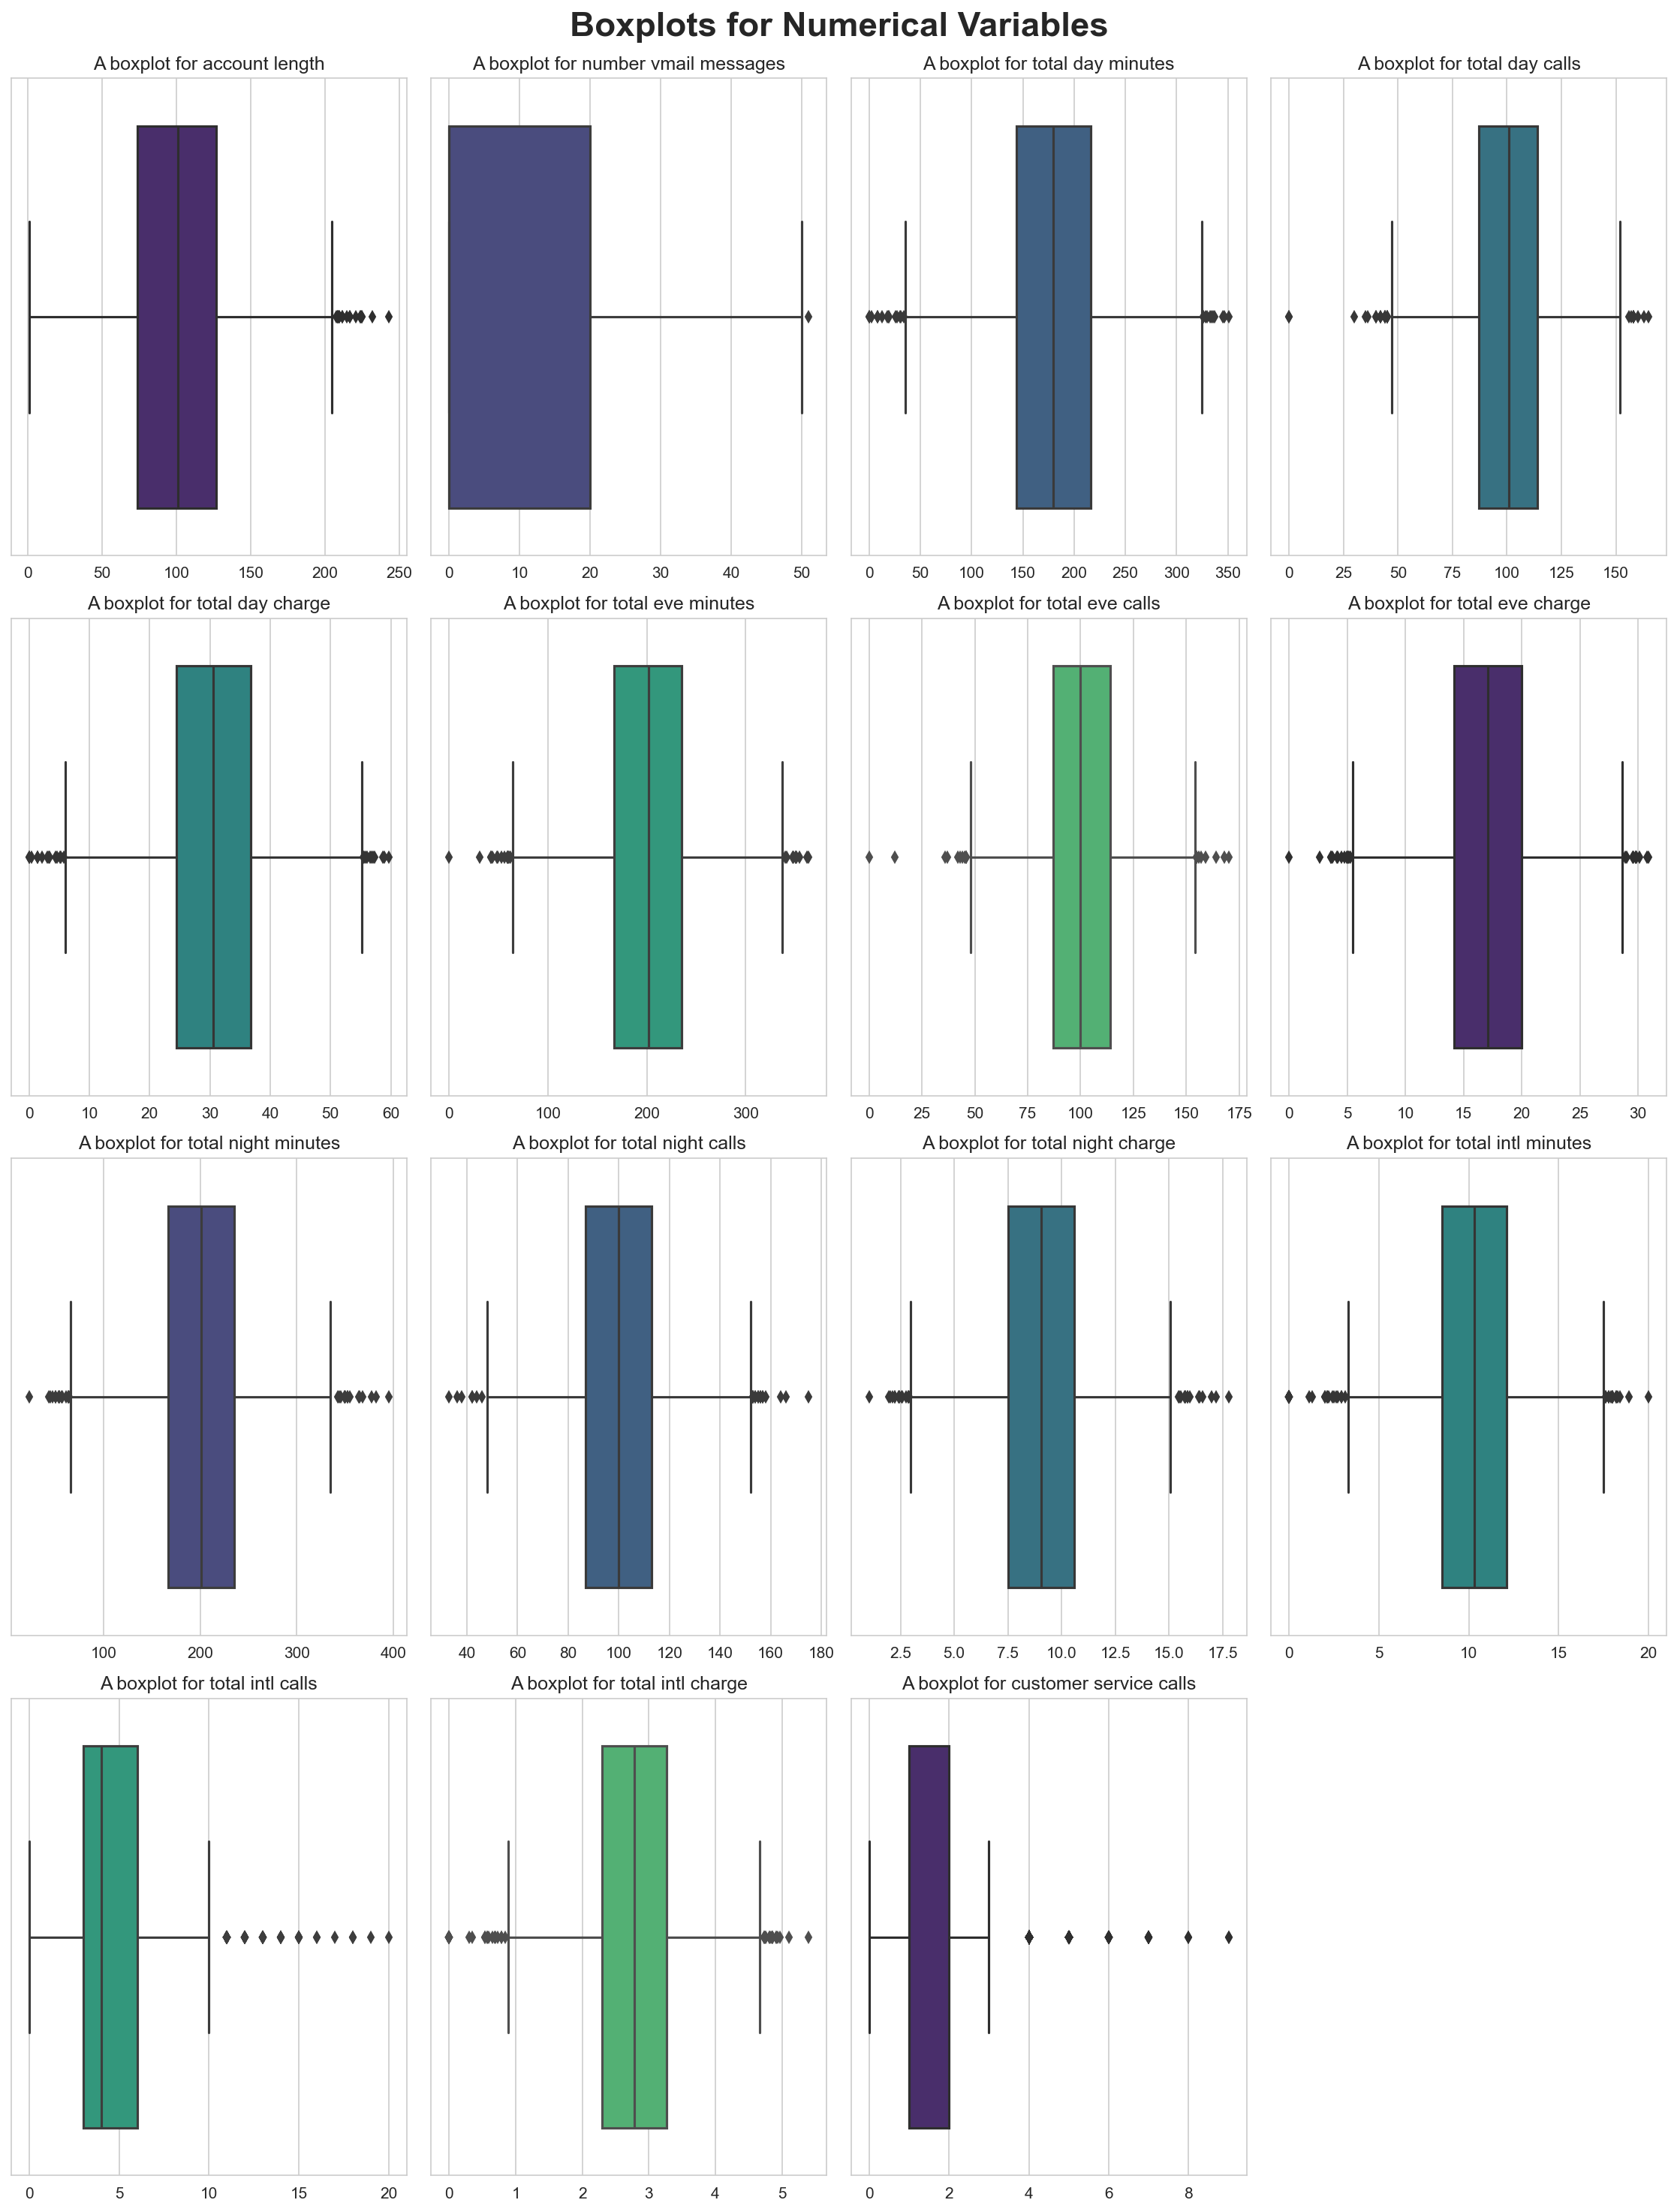

In [209]:
# boxplot for numerical variables
plt.figure(figsize=(15, 20)) 

boxplot_colors = ["#482475","#414487","#355f8d","#2a788e","#21908d","#22a884","#44bf70"]

for i, var in enumerate(numerical_vars):
    plt.subplot(4, 4, i + 1)  
    sns.boxplot(x=df[var], color=boxplot_colors[i % len(boxplot_colors)])  
    plt.title(f'A boxplot for {var}')
    plt.xlabel('')
    plt.ylabel('')  
    plt.tight_layout()  

plt.rcParams["figure.dpi"] = 150  
plt.suptitle('Boxplots for Numerical Variables\n', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95) 
plt.show()

These trends reveal different ways customers behave, like how long they've had their accounts, if they use voicemail, how often they call, how long their international calls last, and how often they ask for service. When we see outliers in these patterns, it could mean there are different groups of customers with specific needs or behaviors. This understanding helps us create marketing or service plans that better suit each group's needs.

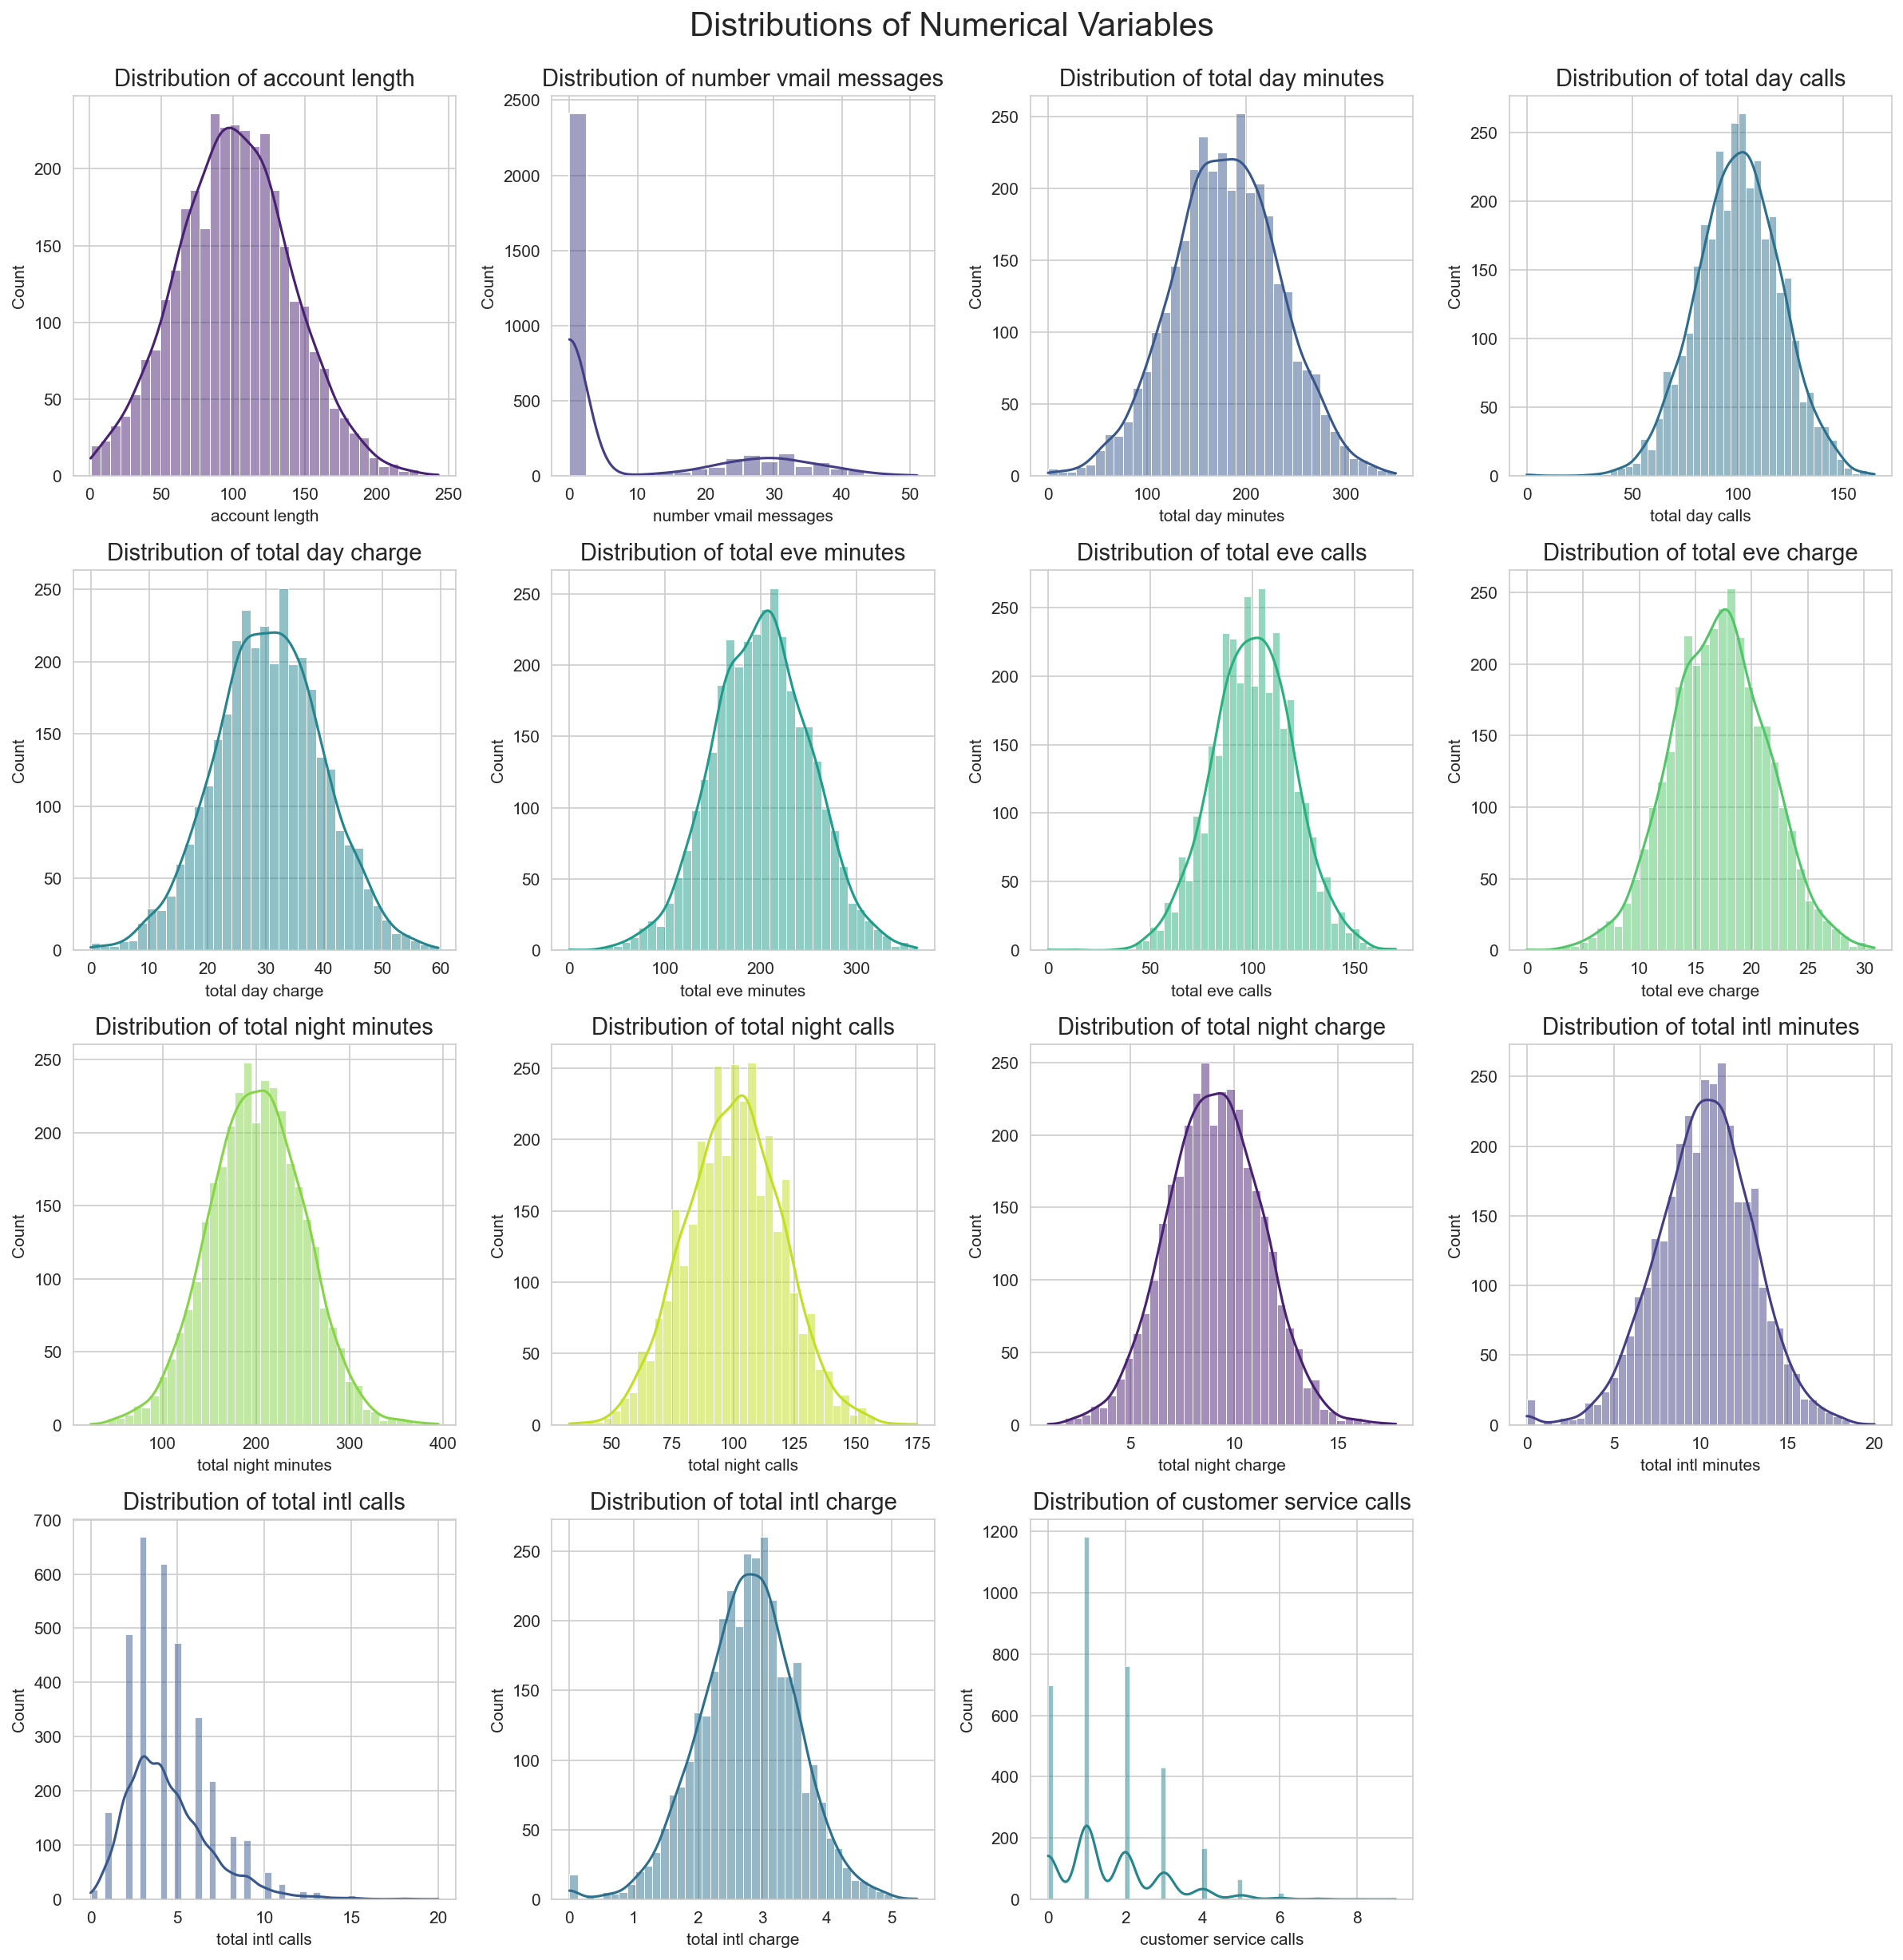

In [210]:
# distributions of numerical variables
num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
axes = axes.ravel()

for i, col in enumerate(numerical_vars):
    if i < len(numerical_vars):  
        sns.histplot(df[col], kde=True, ax=axes[i], color=sns.color_palette("viridis", 10)[i % 10])  
        axes[i].set_title(f'Distribution of {col}', fontsize=14)

for i in range(len(numerical_vars), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Distributions of Numerical Variables', fontsize=20, y=1.02)
plt.show()

Most of the variables display a familiar bell-shaped curve, suggesting a normal distribution. However, there are a few standout cases. For instance number of voicemail messages, total international calls and customer service calls show a different pattern. Instead of being symmetrically distributed around the mean, these variables are skewed towards higher values. This means that there are more instances of higher values, resulting in a longer tail on the right side of the curve.

In [211]:
# calculate skewness and kurtosis for numerical columns
from scipy.stats import skew, kurtosis

skewness_values = df[numerical_vars].apply(skew)
kurtosis_values = df[numerical_vars].apply(kurtosis)

skew_kurtosis_df = pd.DataFrame({'Skewness': skewness_values, 'Kurtosis': kurtosis_values})
skew_kurtosis_df

,Skewness,Kurtosis
account length,0.096563,-0.109474
number vmail messages,1.264254,-0.052852
total day minutes,-0.029064,-0.021710
total day calls,-0.111736,0.241017
total day charge,-0.029070,-0.021582
total eve minutes,-0.023867,0.023792
total eve calls,-0.055538,0.204048
total eve charge,-0.023847,0.023650
total night minutes,0.008917,0.083888
total night calls,0.032485,-0.073711


- Skewness: Indicates the asymmetry of the distribution.
  - Positive skewness (greater than 0) suggests the distribution is skewed to the right, with a tail on the right side.
  - Negative skewness (less than 0) indicates the distribution is skewed to the left, with a tail on the left side.
- Kurtosis: Describes the shape of the distribution's tails.
  - Positive kurtosis (greater than 0) means the distribution has heavier tails, indicating more outliers or extreme values.
  - Negative kurtosis (less than 0) indicates lighter tails compared to a normal distribution.

For example:

- Number of voicemail messages: It has positive skewness (1.26) and near-zero kurtosis (-0.05), suggesting a right-skewed distribution with relatively normal tails.
- Total intl calls: Exhibits high positive skewness (1.32) and positive kurtosis (3.08), indicating a heavily right-skewed distribution with heavier tails, likely due to more outliers or extreme values.
- Customer service calls: Shows positive skewness (1.09) and positive kurtosis (1.73), indicating a right-skewed distribution with heavier tails, suggesting more occurrences of higher values compared to a normal distribution.

Visualising our categorical variables:

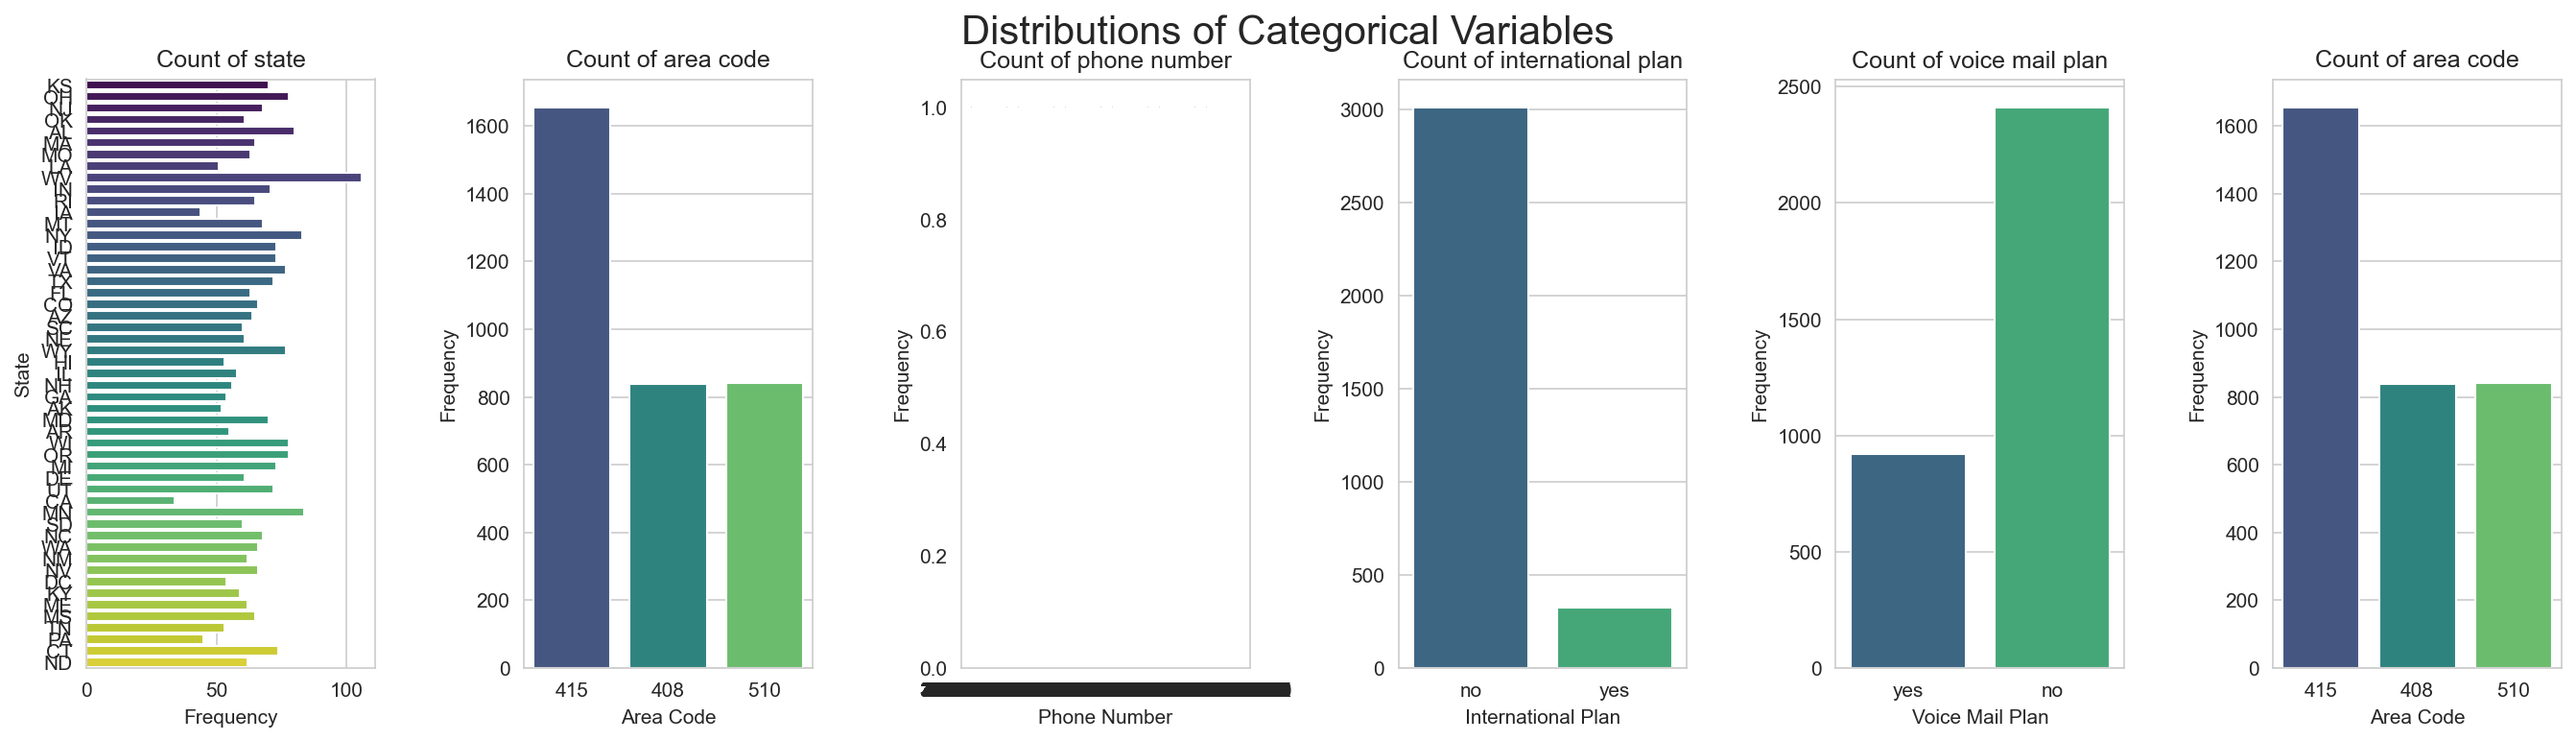

In [212]:
# Exclude phone number column
categorical_vars = [var for var in categorical_vars if var != 'phone_number']

fig, axes = plt.subplots(ncols=len(categorical_vars), figsize=(18, 5))

for i, var in enumerate(categorical_vars):
    if var == 'state':
        sns.countplot(data=df, y=var, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count of {var}', fontsize=12)
        axes[i].set_xlabel('Frequency', fontsize=10)
        axes[i].set_ylabel(var.title(), fontsize=10)
    else:
        sns.countplot(data=df, x=var, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Count of {var}', fontsize=12)
        axes[i].set_xlabel(var.title(), fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        
        if var == 'area_code':
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.suptitle('Distributions of Categorical Variables', fontsize=20, y=1.02)
plt.show()

Feature Engineering:

In [213]:
# create new features; Total calls, Total charges, Total talktime and Average call duration per customer
df["Total charge"] = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1)
df["Total Talk time"] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)
df["Total calls"] = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum(axis=1)
df["Avg Call duration"]= df["Total Talk time"] / df["Total calls"]

In [214]:
# create day to night ratio per customer column
df["day_night_ratio"] = df["total day calls"]/df["total night calls"]
print(df["day_night_ratio"].describe())

count    3333.000000
mean        1.047618
std         0.323065
min         0.000000
25%         0.826923
50%         1.000000
75%         1.216867
max         3.939394
Name: day_night_ratio, dtype: float64


In [215]:
# create columns for charges per call for day, evening, night and international calls per customer
df["charge_per_call_night"] = df["total night charge"] / df["total night minutes"]
df["charge_per_call_day"] = df["total day charge"] / df["total day minutes"]
df["charge_per_call_eve"]= df["total eve charge"] / df["total eve minutes"]
df["charge_per_call_intl"] = df["total intl charge"] / df["total intl minutes"]

In [216]:
# summary statistics for different charges of calls.
summary_stats = df[["charge_per_call_night", "charge_per_call_day", "charge_per_call_eve", "charge_per_call_intl"]].describe()
summary_stats

,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333.000000,3331.000000,3332.000000,3315.000000
mean,0.045000,0.170003,0.085001,0.270057
std,0.000017,0.000028,0.000016,0.000329
min,0.044828,0.169231,0.084936,0.268182
25%,0.044988,0.169989,0.084988,0.269811
50%,0.045000,0.170004,0.085000,0.270000
75%,0.045013,0.170017,0.085013,0.270297
max,0.045111,0.170513,0.085075,0.272727


In [217]:
# voice message to call ratio for each customer
df["voice_message_call_ratio"] = df["number vmail messages"]/ df["Total calls"]
df["voice_message_call_ratio"].describe()

count    3333.000000
mean        0.026910
std         0.045928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.062670
max         0.188525
Name: voice_message_call_ratio, dtype: float64

-  It seems like customers make more calls during the day than at night.

- Here are the average call rates:

  -  Night time calls: 4.5 cents per minute
  -  Daytime calls: 17 cents per minute
  -  Evening calls: 8.5 cents per minute
  -  International calls: 27 cents per minute.

In [218]:
df.describe(include="all")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,Total charge,Total Talk time,Total calls,Avg Call duration,day_night_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl,voice_message_call_ratio
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,3332.000000,3315.000000,3333.000000
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WV,NaN,415,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,59.449754,591.864776,305.137114,1.964884,1.047618,0.045000,0.170003,0.085001,0.270057,0.026910
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,10.502261,89.954251,34.448164,0.376958,0.323065,0.000017,0.000028,0.000016,0.000329,0.045928
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,22.930000,284.300000,191.000000,0.798596,0.000000,0.044828,0.169231,0.084936,0.268182,0.000000
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,52.380000,531.500000,282.000000,1.705187,0.826923,0.044988,0.169989,0.084988,0.269811,0.000000
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,59.470000,593.600000,305.000000,1.939936,1.000000,0.045000,0.170004,0.085000,0.270000,0.000000
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,66.480000,652.400000,328.000000,2.195963,1.216867,0.045013,0.170017,0.085013,0.270297,0.062670


In [219]:
# unique values in churn column 
df['churn'].unique()

array([0, 1])

In [220]:
# a count of churned and non-churned customers
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

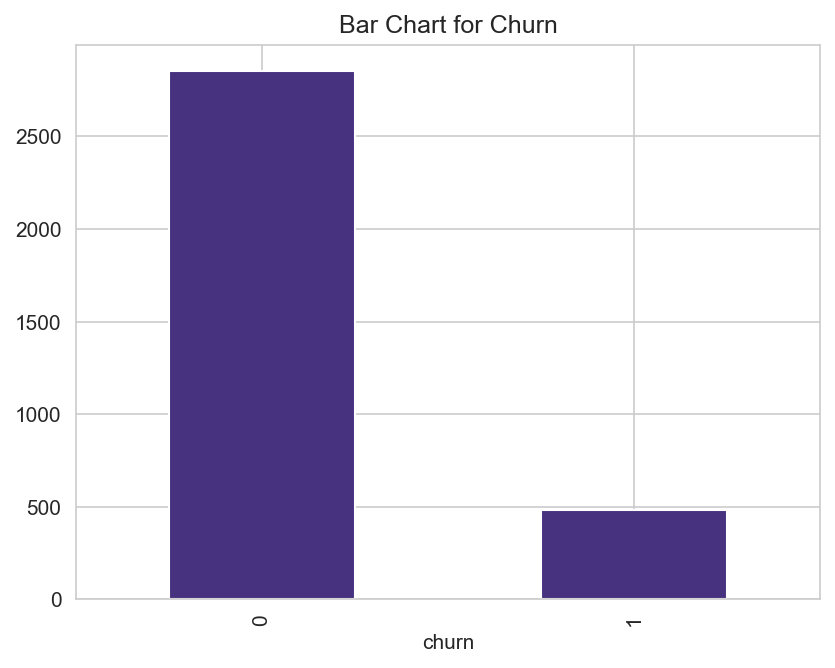

In [221]:
# a bar chart for the distribution of churn 
sns.set_palette("viridis")
df['churn'].value_counts().plot(kind = 'bar')
plt.title('Bar Chart for Churn')
plt.show()

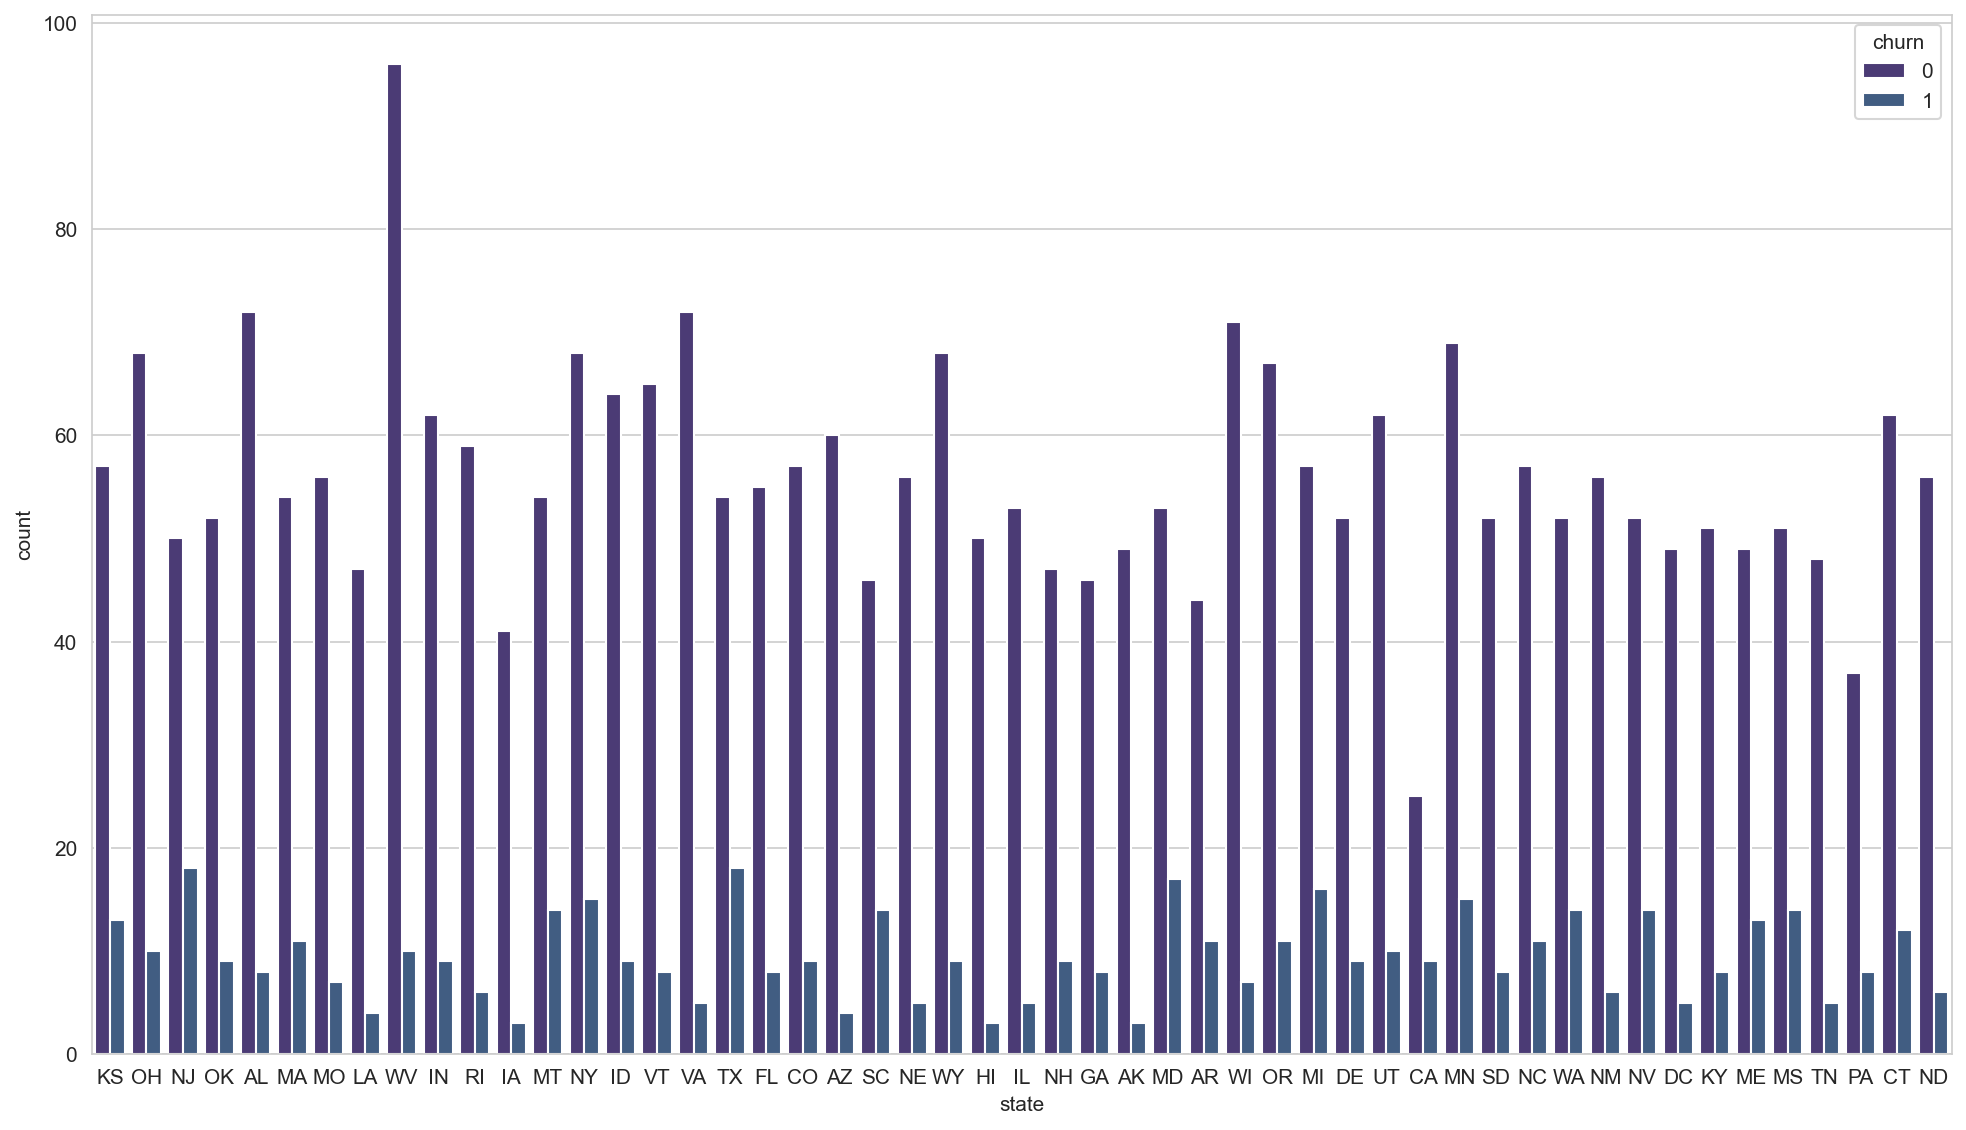

In [222]:
# change churn column to string
df['churn'] = df['churn'].astype(str)

# churn against state
sns.set_palette("viridis")
sns.set_style('whitegrid')
plt.figure(figsize = (16, 9))
ax = sns.countplot(x = 'state', hue = 'churn', data = df)
plt.show()

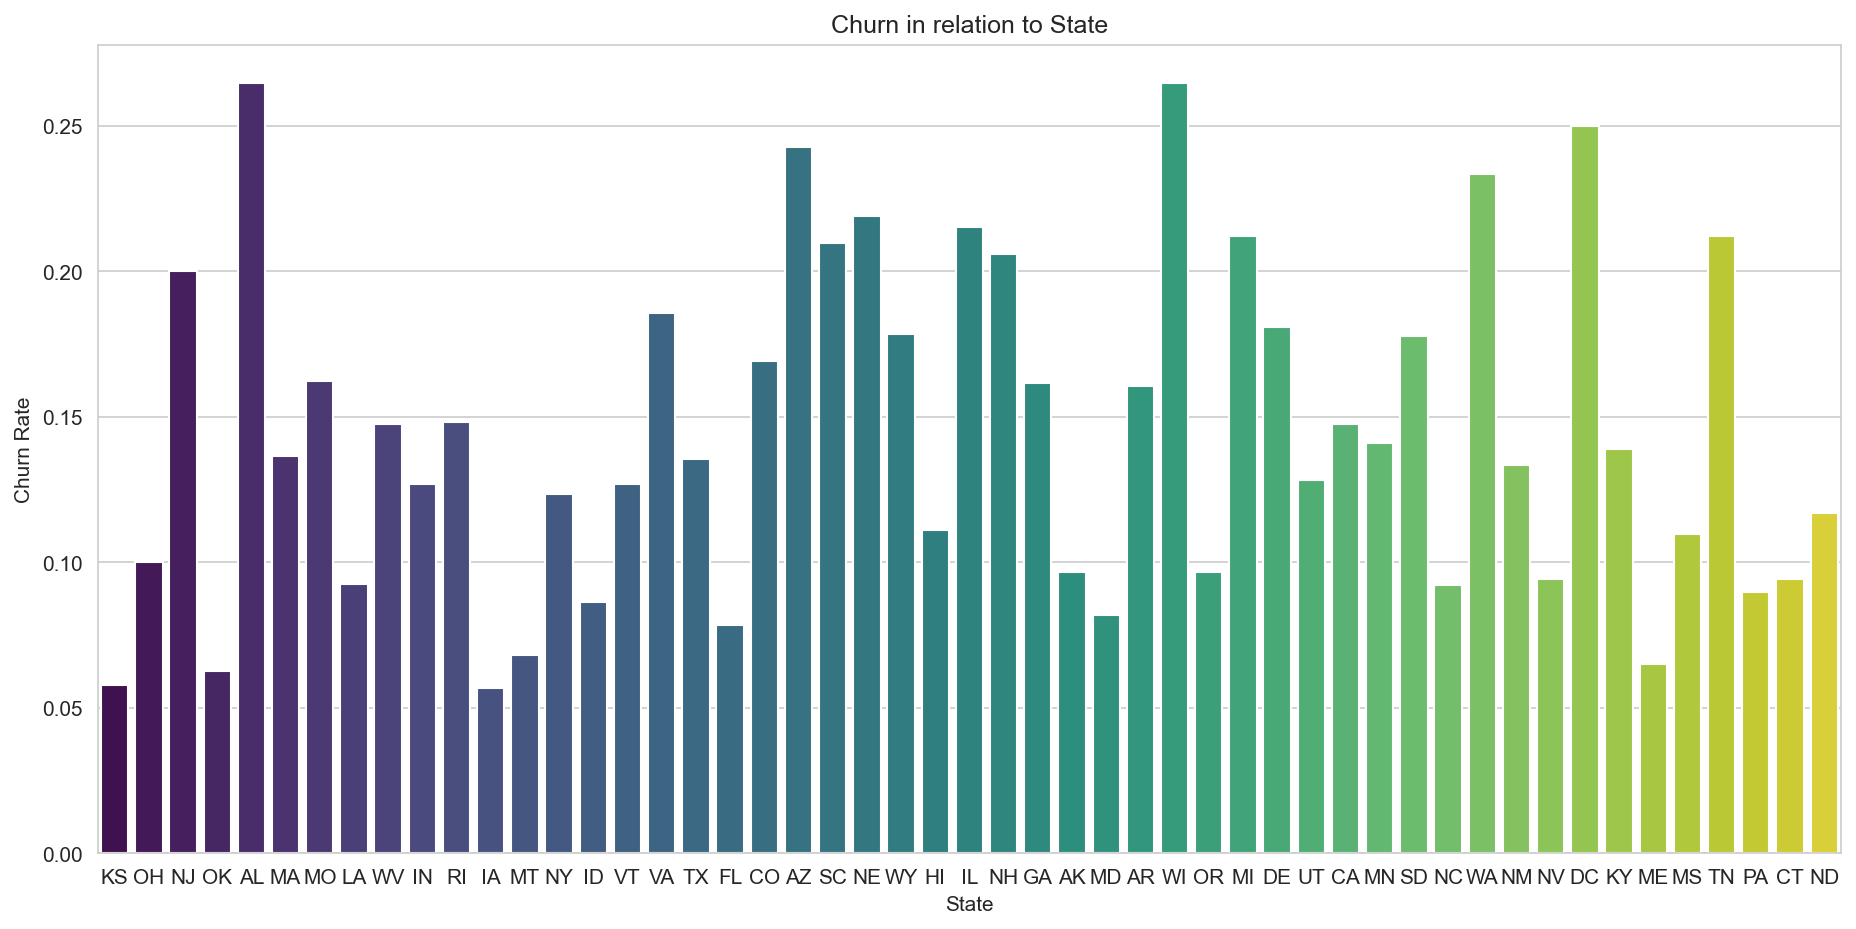

In [223]:
# Ensure 'churn' column is of numeric type
df['churn'] = df['churn'].astype(int)

# Calculate churn rate grouped by state
churn_rate_by_state = df.groupby('state')['churn'].mean().reset_index()

a1 = df['state'].unique()
a2 = df.groupby(['state'])['churn'].mean()

plt.figure(figsize=(15, 7))

sns.barplot(x=a1, y=a2, palette='viridis')

plt.title('Churn in relation to State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

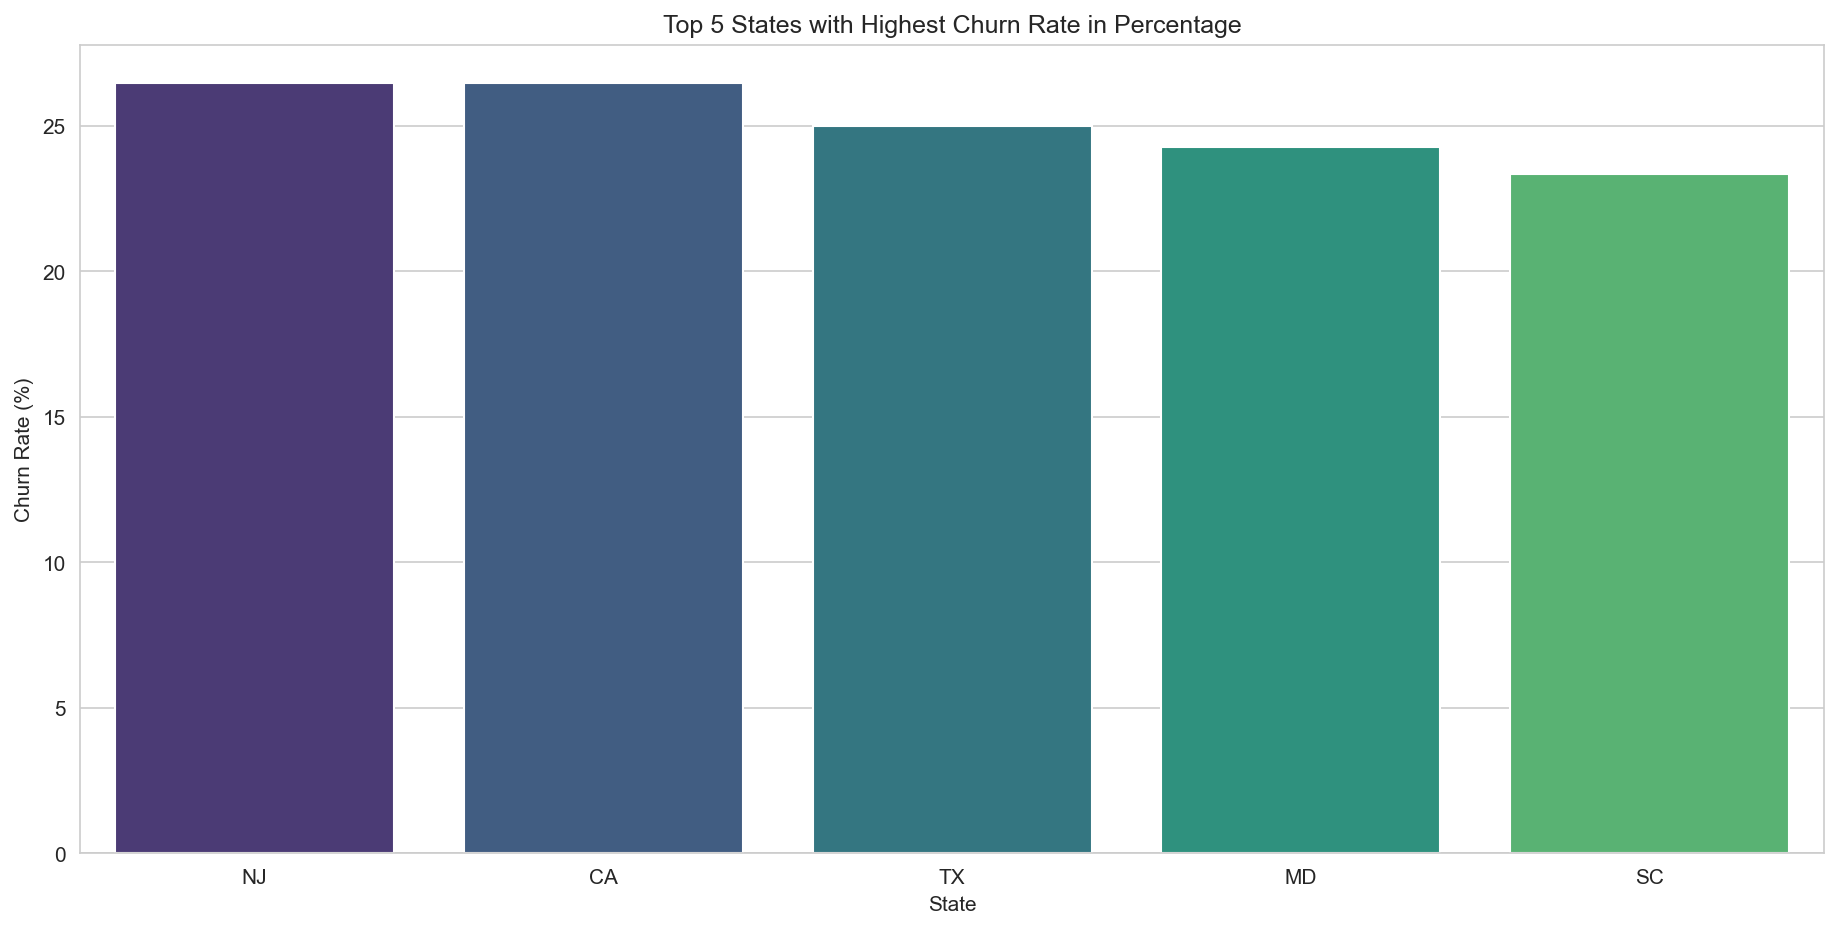

In [224]:
# top 5  states with the highest churn rate
states = df['state'].unique()
churn_rate_percentage = df.groupby(['state'])['churn'].mean() * 100  
top_states = churn_rate_percentage.sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 7))
sns.set_palette("viridis")
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 5 States with Highest Churn Rate in Percentage')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()

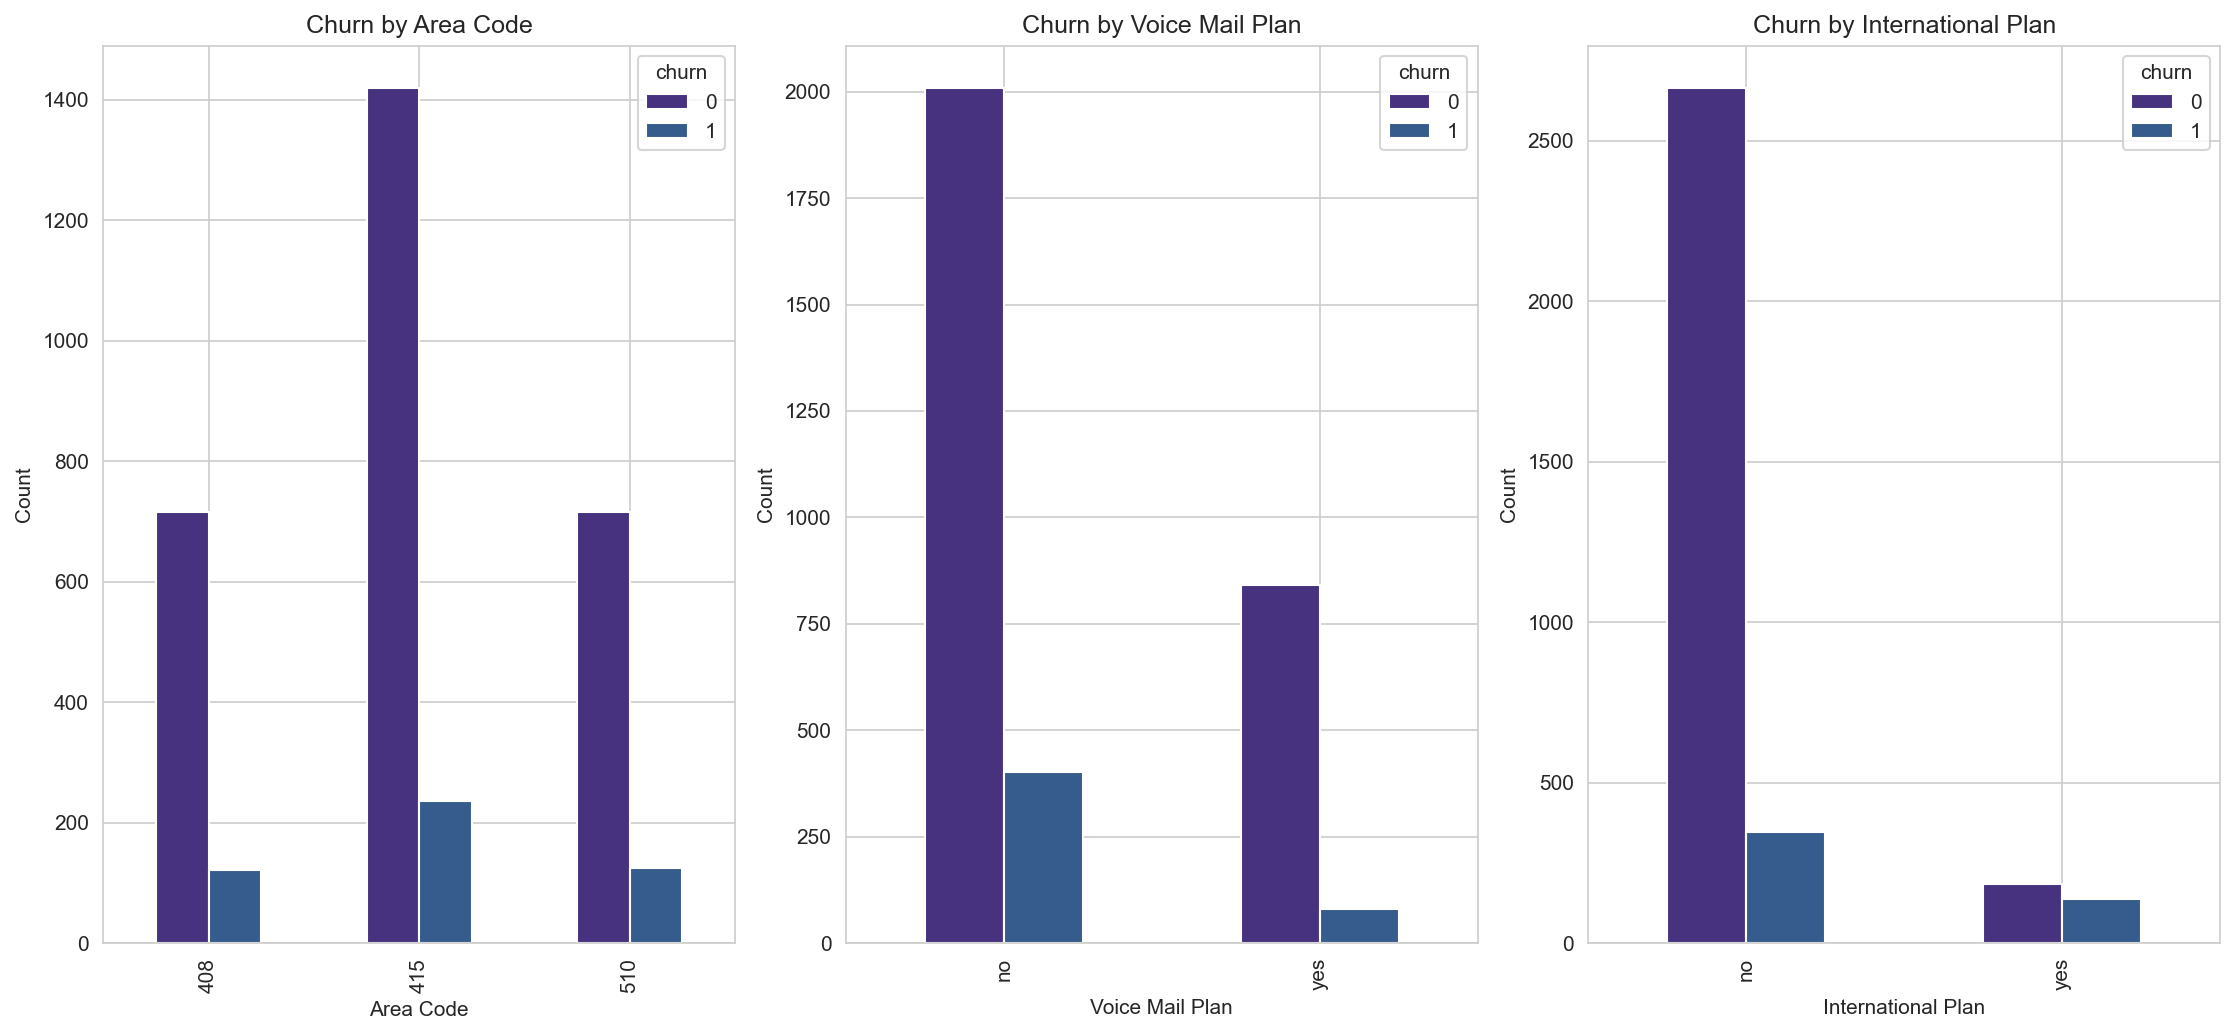

In [225]:
# churn against categorical variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sns.set_palette("viridis")

df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [226]:
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

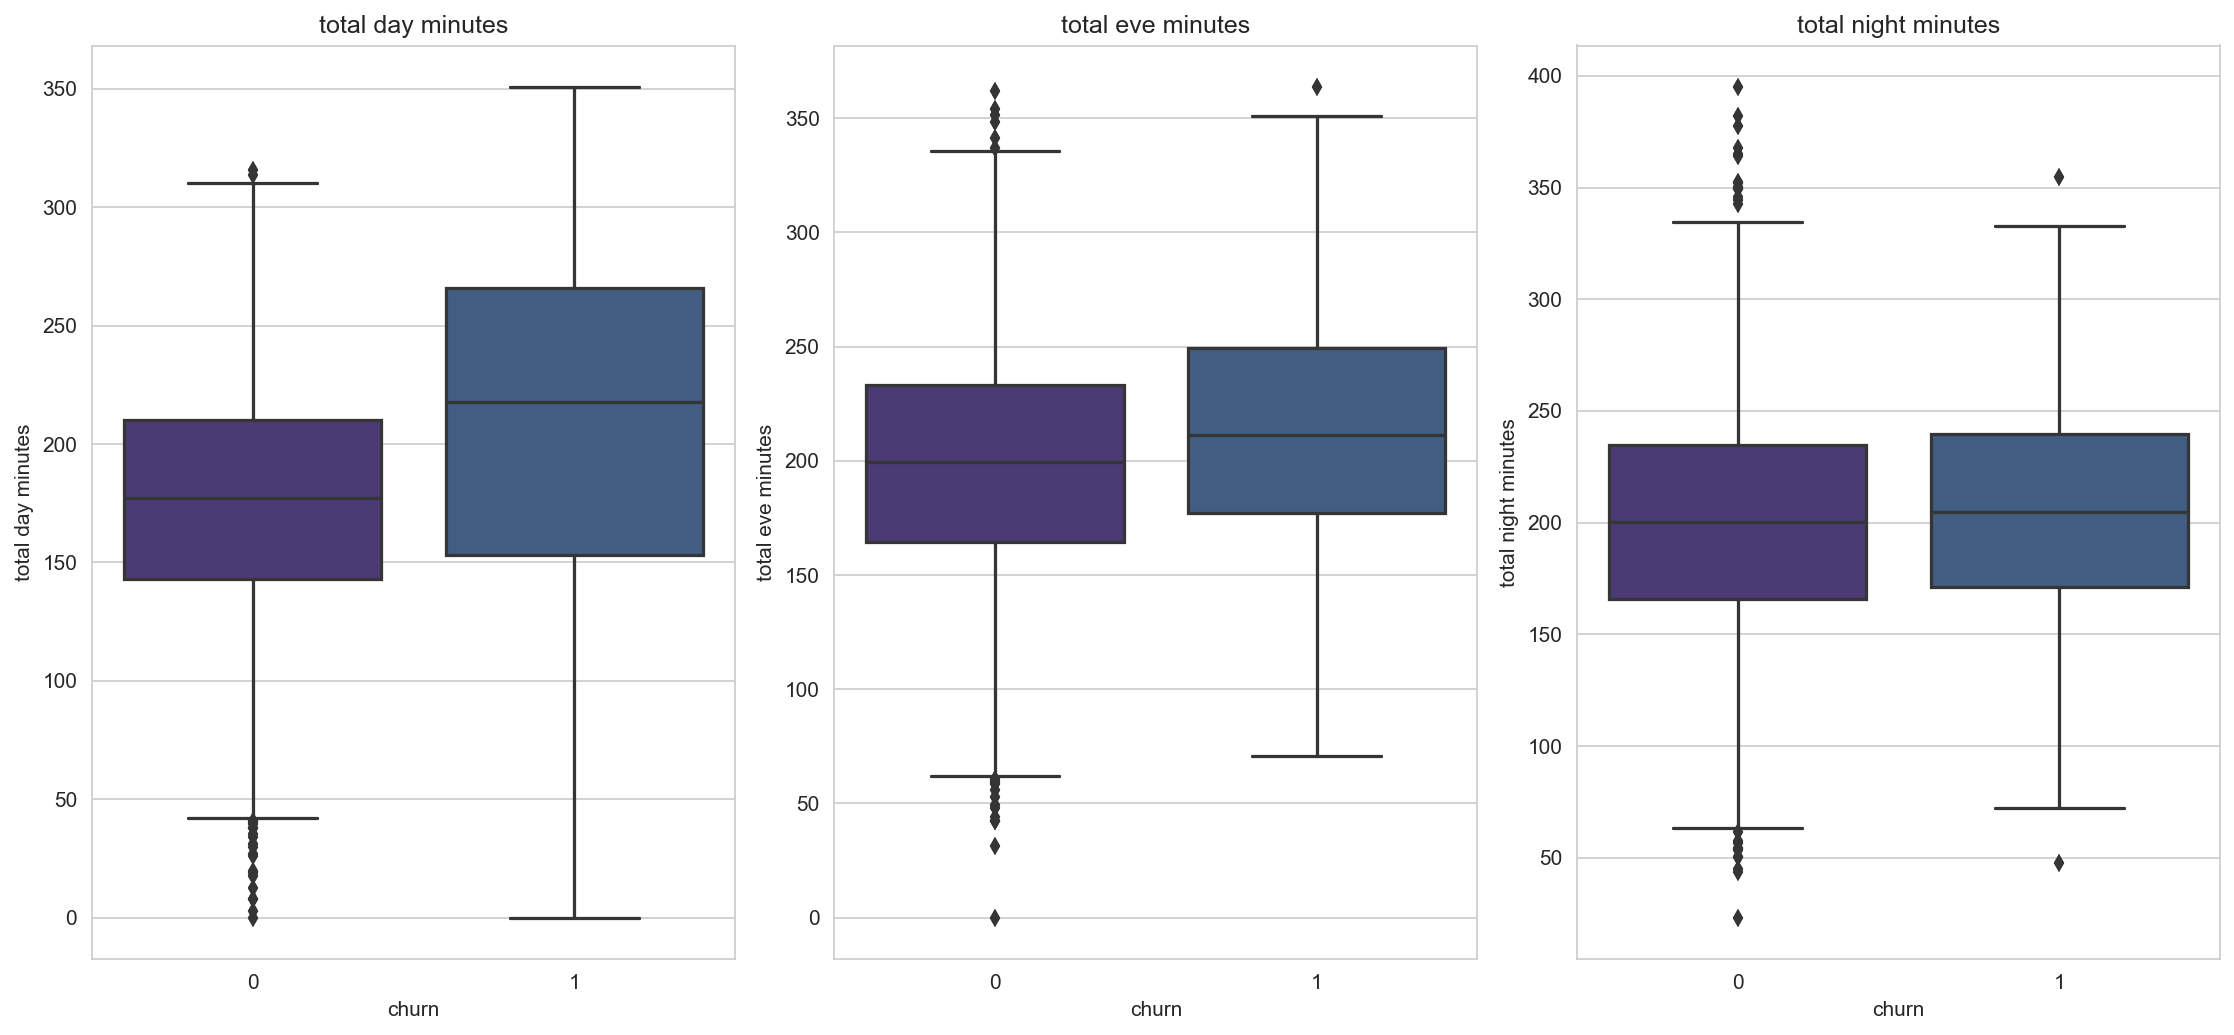

In [227]:
# churn agaisnt numerical variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sns.set_palette("viridis")
numerical_columns = ["total day minutes", "total eve minutes", "total night minutes"]

for i in enumerate(numerical_columns):
    sns.boxplot(x="churn", y=i[1], data=df, ax=axs[i[0]])
    axs[i[0]].set_title(i[1])

    sns.boxplot(x="churn", y=i[1], data=df, ax=axs[i[0]])
    axs[i[0]].set_title(i[1])

plt.tight_layout()
plt.show()

In [228]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
numeric=['account length','total minutes', 'total calls', 'total day charge']

In [229]:
# check for multicollinearity
def check_multicollinearity(df, threshold=0.8):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

multicollinear_features = check_multicollinearity(df)

total intl charge --- total intl minutes
Total charge --- total minutes
Total Talk time --- total minutes
total night charge --- total night minutes
total day charge --- total day minutes
Total charge --- total day minutes
Total charge --- total day charge
Total Talk time --- Total charge
number vmail messages --- voice_message_call_ratio
total eve charge --- total eve minutes
Total calls --- total calls


In [230]:
# drop columns with multicollinearity
features = ['total day minutes', 'number vmail messages','total minutes', 'total day minutes', 'Total charge', 'total intl charge', 'total night minutes', 'total eve minutes', 'Total charge']
df = df.drop(features, axis=1)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,...,Total Talk time,Total calls,Avg Call duration,day_night_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl,voice_message_call_ratio,total calls
0,KS,128,415,382-4657,no,yes,110,45.07,99,16.78,...,717.2,303,2.366997,1.208791,0.044994,0.170011,0.085005,0.270000,0.082508,303
1,OH,107,415,371-7191,no,yes,123,27.47,103,16.62,...,625.2,332,1.883133,1.194175,0.045008,0.169988,0.085013,0.270073,0.078313,332
2,NJ,137,415,358-1921,no,no,114,41.38,110,10.30,...,539.4,333,1.619820,1.096154,0.045018,0.170008,0.084983,0.269672,0.000000,333
3,OH,84,408,375-9999,yes,no,71,50.90,88,5.26,...,564.8,255,2.214902,0.797753,0.044997,0.170007,0.084976,0.269697,0.000000,255
4,OK,75,415,330-6626,yes,no,113,28.34,122,12.61,...,512.0,359,1.426184,0.933884,0.044997,0.170006,0.085030,0.270297,0.000000,359


In [231]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn',
       'Total Talk time', 'Total calls', 'Avg Call duration',
       'day_night_ratio', 'charge_per_call_night', 'charge_per_call_day',
       'charge_per_call_eve', 'charge_per_call_intl',
       'voice_message_call_ratio', 'total calls'],
      dtype='object')

Scaling and Encoding:

In [232]:
# drop phone number column 
df = df.drop('phone number', axis=1)
df.dropna(inplace=True)

In [233]:
df.select_dtypes(include=np.number).columns

Index(['account length', 'total day calls', 'total day charge',
       'total eve calls', 'total eve charge', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn', 'Total Talk time', 'Total calls',
       'Avg Call duration', 'day_night_ratio', 'charge_per_call_night',
       'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl',
       'voice_message_call_ratio', 'total calls'],
      dtype='object')

In [234]:
# identify numerical and categorical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']

numerical_features = ['account length', 'total day calls', 'total day charge',
'total eve calls', 'total eve charge', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls',
'customer service calls', 'Total Talk time', 'Total calls',
'Avg Call duration', 'day_night_ratio', 'charge_per_call_night',
'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl',
'voice_message_call_ratio', 'total calls']

In [235]:
# scale numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [236]:
# one hot encode categorical data
df = pd.get_dummies(df, columns=categorical_features)

Modelling:

In [237]:
# feature
X = df.drop('churn', axis=1)
# target
y = df['churn']

In [238]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
# value count for target variable
y_train.value_counts()

churn
0    2256
1     393
Name: count, dtype: int64

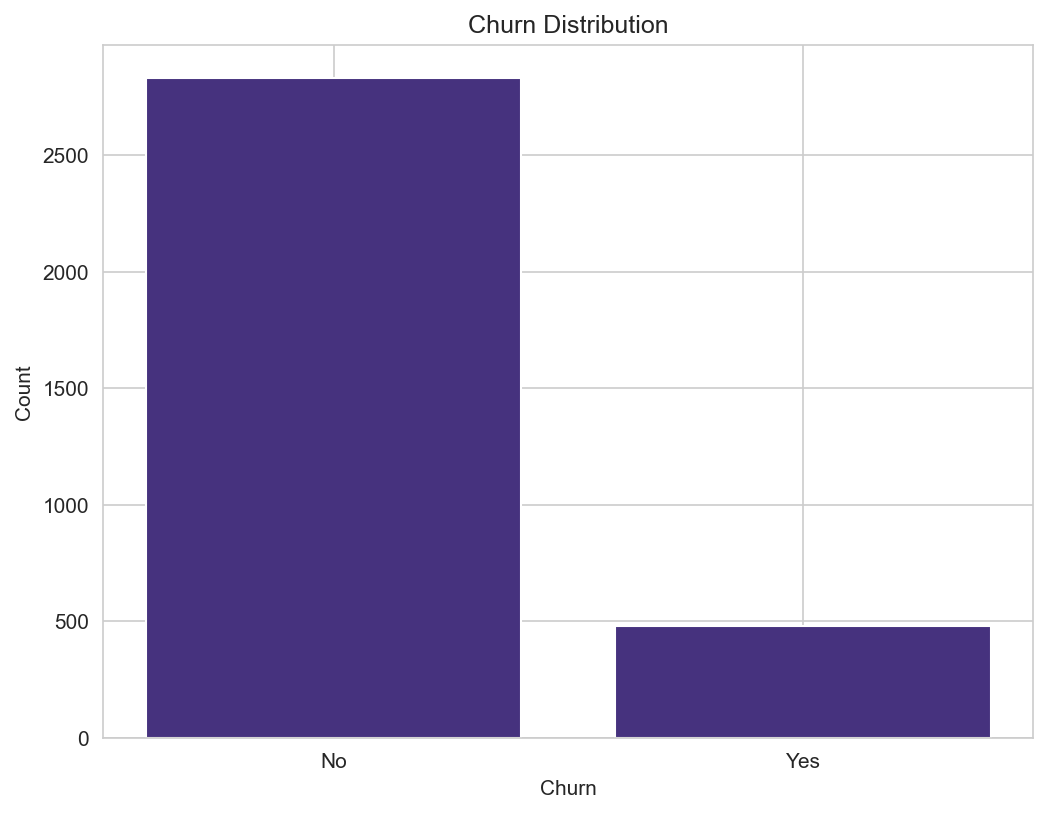

In [240]:
# target variable distribution
plt.figure(figsize=(8, 6))
sns.set_palette("viridis")
churn_counts = df['churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [241]:
# feature
y = df['churn']
# target
X = df.drop('churn', axis=1)

In [242]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2649, 78)
X_test shape: (663, 78)
y_train shape: (2649,)
y_test shape: (663,)


In [243]:
# apply SMOTE to the training data and training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Baseline Model:

In [244]:
# instance of decision tree
clf = DecisionTreeClassifier(random_state=42)

# fit the model on the training data
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [245]:
def evaluating_model_performance(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the performance of a given model on the training and test sets.
    """
    # fit the model
    model.fit(X_train, y_train)

    # predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)  
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # F1 score
    train_f1_score = f1_score(y_train, y_train_pred)
    test_f1_score = f1_score(y_test, y_test_pred)

    # evaluation metrics
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Train Precision:", train_precision)
    print("Test Precision:", test_precision)
    print("Train Recall:", train_recall)
    print("Test Recall:", test_recall)
    print("Train F1 Score:", train_f1_score)
    print("Test F1 Score:", test_f1_score)

evaluating_model_performance(clf, X_train_resampled, y_train_resampled, X_test, y_test)

Train Accuracy: 1.0
Test Accuracy: 0.8974358974358975
Train Precision: 1.0
Test Precision: 0.5981308411214953
Train Recall: 1.0
Test Recall: 0.7191011235955056
Train F1 Score: 1.0
Test F1 Score: 0.6530612244897959


In [246]:
# parameters for grid search
params = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [247]:
# best model
best_clf = grid_search.best_estimator_
y_predd = best_clf.predict(X_test)

In [248]:
# tuned decision tree model
evaluating_model_performance(best_clf, X_train_resampled, y_train_resampled, X_test, y_test)

Train Accuracy: 0.9685283687943262
Test Accuracy: 0.918552036199095
Train Precision: 0.9920856610800745
Test Precision: 0.6881720430107527
Train Recall: 0.9445921985815603
Test Recall: 0.7191011235955056
Train F1 Score: 0.9677565849227975
Test F1 Score: 0.7032967032967034


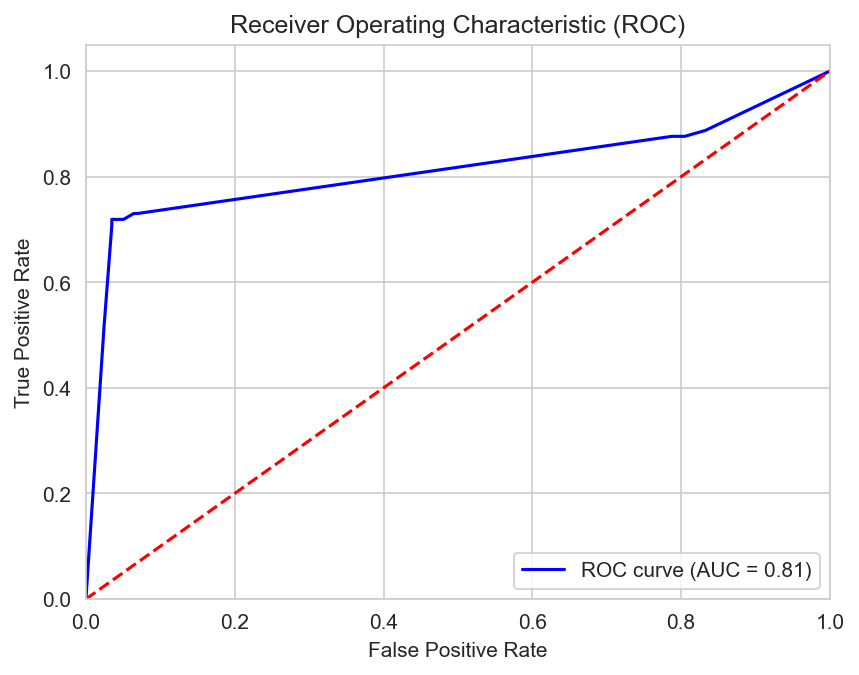

In [249]:
# get the predicted probabilities for class 1
y_scores = best_clf.predict_proba(X_test)[:, 1]

# compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Logistic Regression:

In [250]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

In [251]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate model performance metrics: accuracy, precision, recall, and F1-score.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :return: Dictionary of metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

results = {}

for model_name, model in models.items():
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    metrics_test = calculate_metrics(y_test, y_pred_test)
    metrics_train = calculate_metrics(y_train, y_pred_train)

    results[(model_name, 'Test')] = metrics_test
    results[(model_name, 'Train')] = metrics_train

results_df = pd.DataFrame(results).T

results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.876320   0.561404  0.359551  0.438356
                    Train  0.867875   0.581132  0.391858  0.468085
Random Forest       Test   0.938160   0.863636  0.640449  0.735484
                    Train  1.000000   1.000000  1.000000  1.000000
Gradient Boosting   Test   0.939668   0.802469  0.730337  0.764706
                    Train  0.969800   0.917333  0.875318  0.895833

In [252]:
# hyperparameters
rf_params = {
    'n_estimators': [50,100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [253]:
for model_name, model in models.items():
    if model_name == "Random Forest":
        grid_search = GridSearchCV(model, rf_params, cv=5, n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)
        best_params = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        model = grid_search.best_estimator_
    else:
        model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [254]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=150, random_state=42)

In [255]:
# predictions on training data
y_train_pred = rf.predict(X_train_resampled)

# predictions on test data
y_test_pred = rf.predict(X_test)

# evaluate the model on training set
print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train_resampled, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train_resampled, y_train_pred):.4f}")
print(f"F1 Score: {f1_score(y_train_resampled, y_train_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train_resampled, y_train_pred)}")

# evaluate the model on test set
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

Training Set Performance:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9996
F1 Score: 0.9998
Confusion Matrix:
[[2256    0]
 [   1 2255]]

Test Set Performance:
Accuracy: 0.9367
Precision: 0.8406
Recall: 0.6517
F1 Score: 0.7342
Confusion Matrix:
[[563  11]
 [ 31  58]]


In [256]:
# fit the RandomForestClassifier with the best hyperparameters on the training data
rf.fit(X_train_resampled, y_train_resampled)

# predictions on training data
y_train_pred = rf.predict(X_train)

# predictions on test data
y_test_pred = rf.predict(X_test)

# evaluate the model on training set
evaluating_model_performance(rf, X_train, y_train, X_test, y_test)

Train Accuracy: 1.0
Test Accuracy: 0.9215686274509803
Train Precision: 1.0
Test Precision: 0.9512195121951219
Train Recall: 1.0
Test Recall: 0.43820224719101125
Train F1 Score: 1.0
Test F1 Score: 0.6


In [257]:
# predictions on test set
y_test_pred_rf = rf.predict(X_test)

In [258]:
# hyperparameters
logistic_params_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

In [259]:
# logistic regression model
logreg = LogisticRegression()

# create grid search CV
grid_search = GridSearchCV(logreg, logistic_params_grid, cv=5, n_jobs=-1)

# fit the model on resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# use best hyperparameters to fit the model
best_logistic_model = LogisticRegression(**best_params)

# fit the model on training data
best_logistic_model.fit(X_train_resampled, y_train_resampled)

# predictions
y_test_pred = best_logistic_model.predict(X_test)

# evaluate the model
evaluating_model_performance(best_logistic_model, X_train_resampled, y_train_resampled, X_test, y_test)

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.9173315602836879
Test Accuracy: 0.8793363499245852
Train Precision: 0.9631087063453025
Test Precision: 0.6153846153846154
Train Recall: 0.8679078014184397
Test Recall: 0.2696629213483146
Train F1 Score: 0.9130333411051527
Test F1 Score: 0.375


Gradient Boost Model Tuning:

In [528]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# create gradient boosting classifier
gradient_boosting = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, random_state=42)

# parameter grid for grid search
gradient_params_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}

grid_search_gradient = GridSearchCV(gradient_boosting, gradient_params_grid, cv=5, n_jobs=-1)

# fit the model using grid search
grid_search_gradient.fit(X_train_resampled, y_train_resampled)

# best hyperparameters
best_params = grid_search_gradient.best_params_

# a new model with the best hyperparameters
best_gradient_boosting_model = GradientBoostingClassifier(**best_params)

# fit the new model on resampled data
best_gradient_boosting_model.fit(X_train_resampled, y_train_resampled)

# predictions
y_test_pred_gradient = best_gradient_boosting_model.predict(X_test)

# evaluate the model
evaluating_model_performance(best_gradient_boosting_model, X_train_resampled, y_train_resampled, X_test, y_test)

Train Accuracy: 1.0
Test Accuracy: 0.9441930618401206
Train Precision: 1.0
Test Precision: 0.8333333333333334
Train Recall: 1.0
Test Recall: 0.7303370786516854
Train F1 Score: 1.0
Test F1 Score: 0.7784431137724551


Feature Importances:

In [260]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# coefficients
feature_importance = logreg.coef_[0]

# create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
75,international plan_yes,0.972468
46,state_MT,0.892217
24,state_CA,0.855008
67,state_WA,0.850457
60,state_SC,0.793487
...,...,...
20,state_AK,-0.839291
66,state_VT,-0.933426
65,state_VA,-1.029623
74,international plan_no,-1.059677


In [261]:
# feature importance
feature_importance = logreg.coef_[0]
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                   feature  importance
75  international plan_yes    0.972468
46                state_MT    0.892217
24                state_CA    0.855008
67                state_WA    0.850457
60                state_SC    0.793487
..                     ...         ...
20                state_AK   -0.839291
66                state_VT   -0.933426
65                state_VA   -1.029623
74   international plan_no   -1.059677
59                state_RI   -1.134375

[78 rows x 2 columns]


In [262]:
# top 10 features 
top_features = feature_importance_df.head(10)
top_features.sort_values(by='importance', inplace=True)
top_features

,feature,importance
51,state_NJ,0.563678
9,customer service calls,0.655963
42,state_MI,0.676648
76,voice mail plan_no,0.698182
63,state_TX,0.734783
60,state_SC,0.793487
67,state_WA,0.850457
24,state_CA,0.855008
46,state_MT,0.892217
75,international plan_yes,0.972468


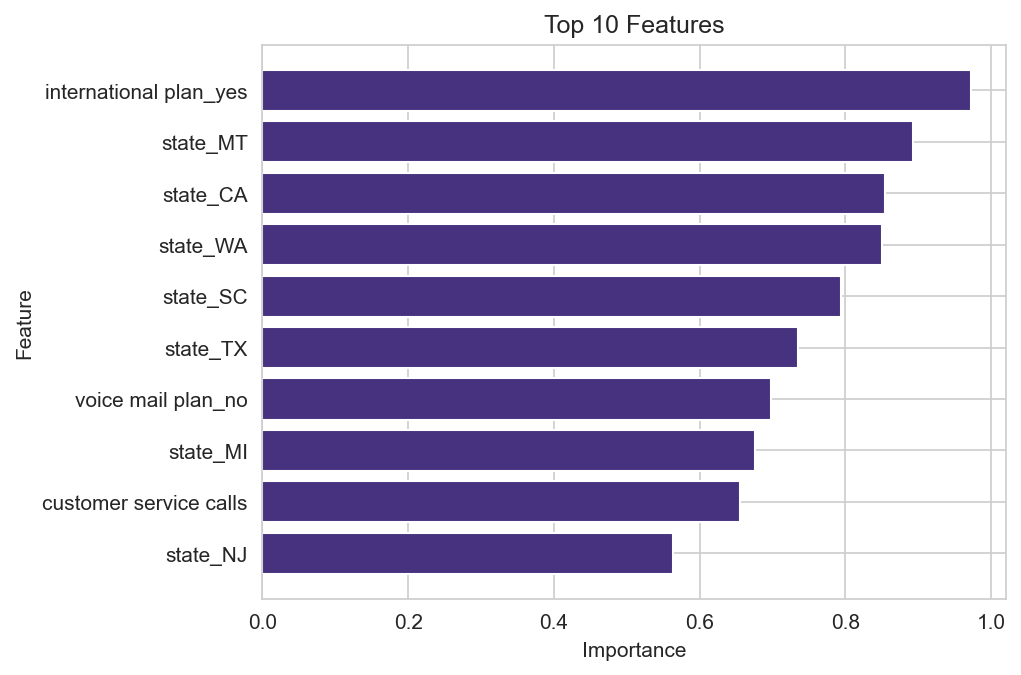

In [263]:
# plot the features 
sns.set_palette("viridis")
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.show()